<a href="https://colab.research.google.com/github/wkdwlgus/ktcloud_genai/blob/main/251016_%EB%B6%84%EB%A5%98%EC%9A%A9_%ED%91%9C%ED%98%84_%EB%AF%B8%EC%84%B8_%ED%8A%9C%EB%8B%9D%ED%95%98%EA%B8%B0_%EC%9E%A5%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Î∂ÑÎ•òÏö© ÌëúÌòÑ Î™®Îç∏ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞ - ÌïúÍ∏Ä**

In [ ]:
%%capture
!pip install datasets setfit seqeval evaluate

- **datasets** :
    - https://huggingface.co/datasets
    - ÌóàÍπÖÌéòÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã
- **setfit** :
    - https://huggingface.co/docs/setfit/index
    - Ï†ÅÏùÄ ÏñëÏùò Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ÎßåÏúºÎ°ú Î¨∏Ïû• Î≥ÄÌôò(Sentence Transformer) Î™®Îç∏ÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÌååÏù∏ÌäúÎãùÌïòÍ∏∞ ÏúÑÌïú ÌîÑÎ†àÏûÑÏõåÌÅ¨
- **seqeval** : (ÌèâÍ∞ÄÏßÄÌëú)
    - https://huggingface.co/spaces/evaluate-metric/seqeval
    - Í∞úÏ≤¥Î™Ö Ïù∏Ïãù(NER:Named Entity Recognition)Í≥º Í∞ôÏùÄ ÏãúÌÄÄÏä§ Î†àÏù¥Î∏îÎßÅ(sequence labeling) ÌÉúÏä§ÌÅ¨Ïùò ÏÑ±Îä•(F1-score, Ï†ïÎ∞ÄÎèÑ Îì±)ÏùÑ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨

## **Îç∞Ïù¥ÌÑ∞**
- Î™®Îç∏: `'klue/bert-base'`
- Îç∞Ïù¥ÌÑ∞: NSMC(Naver Sentiment Movie Corpus)
https://huggingface.co/datasets/Blpeng/nsmc
  - train: 150,000Í∞ú
  - test: 50,000Í∞ú
  - Rotten TomatoesÏôÄ Ïú†ÏÇ¨Ìïú ÌïúÍ∏Ä Îç∞Ïù¥ÌÑ∞ÏÖã

In [ ]:
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌïòÍ≥† Î∂ÑÌï†Ìï©ÎãàÎã§. Í≤∞Ï∏°Í∞íÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
dataset = load_dataset("Blpeng/nsmc")
train_data = dataset['train'].filter(lambda x: x['document'] is not None).shuffle(seed=42).select(range(8500))
test_data = dataset['test'].filter(lambda x: x['document'] is not None).shuffle(seed=42).select(range(1000))

# Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î°úÎìúÌï©ÎãàÎã§.
model_id = "klue/bert-base"
model = AutoModelForSequenceClassification.from_pretrained(
            model_id, num_labels=2)  # Î†àÏù¥Î∏î Í∞úÏàò 2Í∞ú
tokenizer = AutoTokenizer.from_pretrained(model_id)

Repo card metadata block was not found. Setting CardData to empty.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_data

Dataset({
    features: ['Unnamed: 0', 'id', 'document', 'label'],
    num_rows: 8500
})

In [ ]:
test_data

Dataset({
    features: ['Unnamed: 0', 'id', 'document', 'label'],
    num_rows: 1000
})

In [ ]:
train_data[1]

{'Unnamed: 0': 67616, 'id': 7480534, 'document': 'Ïù¥Îü∞ ÏòÅÌôîÎäî Î∂ÅÏ™ΩÏù¥ÎÇò ÌãÄÏñ¥Îùº', 'label': 0}



---



## **ÏßÄÎèÑ Î∂ÑÎ•ò**


Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÏúºÎ°ú ÎÇòÎàïÎãàÎã§.

In [ ]:
def preprocess_function(examples):
   """ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÏúºÎ°ú ÎÇòÎàïÎãàÎã§"""
   return tokenizer(examples["document"], truncation=True)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌï©ÎãàÎã§.
# batched = True -> Ïó¨Îü¨Í∞ú Îç∞Ïù¥ÌÑ∞Î•º Î∞∞ÏπòÎã®ÏúÑ(batch size ÎßåÌÅº Î¨∂Ïñ¥ÏÑú) Ï≤òÎ¶¨ (Î©îÎ™®Î¶¨ Î¨∏Ï†ú)
# batch_size = 1000 (default)
# batched = False -> Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏî© Í∞úÎ≥Ñ Ï≤òÎ¶¨ (ÏãúÍ∞Ñ Î¨∏Ï†ú)
# => Î©îÎ™®Î¶¨ ÏãúÍ∞Ñ trade off
tokenized_train = train_data.map(preprocess_function, batched=True)
tokenized_test = test_data.map(preprocess_function, batched=True)

DataCollator: Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Í≥† Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãùÎèÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî ÌÅ¥ÎûòÏä§

In [ ]:
import torch
# DataCollactorÍ∞Ä Ïôú ÌïÑÏöîÌï†Íπå?
# ÌÜ†ÌÅ∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞
sample1 = {"input_ids": [101, 146, 1567, 102]}                    # Í∏∏Ïù¥ 4
sample2 = {"input_ids": [101, 1188, 1110, 2213, 999, 102]}        # Í∏∏Ïù¥ 6
sample3 = {"input_ids": [101, 2026, 2523, 106, 102]}              # Í∏∏Ïù¥ 5

# Î∞∞ÏπòÎ°ú Î¨∂ÏúºÎ†§Î©¥?
batch = [sample1, sample2, sample3]

# ‚ùå ÌÖêÏÑúÎ°ú Î≥ÄÌôò Î∂àÍ∞ÄÎä•! (Í∏∏Ïù¥Í∞Ä Îã¨ÎùºÏÑú)
tensor = torch.tensor([
    [101, 146, 1567, 102],           # 4Í∞ú
    [101, 1188, 1110, 2213, 999, 102],  # 6Í∞ú  ‚Üê ÏóêÎü¨!
    [101, 2026, 2523, 106, 102]      # 5Í∞ú
])

ValueError: expected sequence of length 4 at dim 1 (got 6)

In [ ]:
from transformers import DataCollatorWithPadding

# Î∞∞ÏπòÏóêÏÑú Í∞ÄÏû• Í∏¥ ÏãúÌÄÄÏä§Ïóê ÎßûÏ∂∞ Ìå®Îî©Ìï©ÎãàÎã§.
# data_collator(samples) ÌòπÏùÄ trainer.train() ÏãúÏ†êÏóê Ìå®Îî©Ïù¥ Ï∂îÍ∞ÄÎê®
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Ï∏°Ï†ï ÏßÄÌëúÎ•º Ï†ïÏùòÌï©ÎãàÎã§. (confusion matrix)

- **F1-score**
    - **Ï†ïÎ∞ÄÎèÑ(Precision)ÏôÄ Ïû¨ÌòÑÏú®(Recall)Ïùò Ï°∞ÌôîÌèâÍ∑†**
    - Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï(Imbalanced Data)Ïù¥ Ïã¨Ìï† Îïå Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ï†ïÌôïÌïòÍ≤å ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ Ï£ºÎ°ú ÏÇ¨Ïö©
    - Ï†ïÎ∞ÄÎèÑ(Precision)ÏôÄ Ïû¨ÌòÑÏú®(Recall)ÏùÑ Î™®Îëê Ï§ëÏöîÌïòÍ≤å Í≥†Î†§Ìï¥Ïïº Ìï† Îïå ÏÇ¨Ïö©

Ï†ïÎ∞ÄÎèÑ (Precision) = TP / (TP + FP)
- Í∏çÏ†ïÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤É Ï§ë Ïã§Ï†ú Í∏çÏ†ï ÎπÑÏú®

Ïû¨ÌòÑÏú® (Recall) = TP / (TP + FN)
- Ïã§Ï†ú Í∏çÏ†ï Ï§ë Í∏çÏ†ïÏúºÎ°ú ÏòàÏ∏°Ìïú ÎπÑÏú®

F1-Score = 2 √ó (Precision √ó Recall) / (Precision + Recall)
- Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò Ï°∞ÌôîÌèâÍ∑†
- Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ -> **Ïã§Ï†ú: Ïä§Ìå∏ 10Í∞ú, Ï†ïÏÉÅ 90Í∞ú**

- Î™®Îç∏Ïù¥ Î™®Îëê "Ï†ïÏÉÅ"Ïù¥ÎùºÍ≥† ÏòàÏ∏° -> **ÏòàÏ∏°: Ï†ÑÎ∂Ä Ï†ïÏÉÅ**

- Ï†ïÌôïÎèÑ = 90/100 = 90%  ‚Üê ÎÜíÏïÑ Î≥¥Ïù¥ÏßÄÎßå...
Ïä§Ìå∏ÏùÑ ÌïòÎÇòÎèÑ Î™ª Ïû°Ïùå! ‚ùå
- Ï†ïÎ∞ÄÎèÑ = 0 / (0 + 0) = Í≥ÑÏÇ∞ Î∂àÍ∞Ä
- Ïû¨ÌòÑÏú® = 0 / (0 + 10) = 0%
- F1-Score = 0%  ‚Üê Ïã§Ï†ú ÏÑ±Îä• Î∞òÏòÅ! ‚úÖ

In [ ]:
import numpy as np
import evaluate


def compute_metrics(eval_pred):
    """F1 Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    load_f1 = evaluate.load("f1")
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"f1": f1}

Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï©ÎãàÎã§.

In [ ]:
from transformers import TrainingArguments, Trainer

# ÌõàÎ†® Îß§Í∞úÎ≥ÄÏàò
training_args = TrainingArguments(
   "model",
   learning_rate=2e-5,              # 0.00002
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=1,
   weight_decay=0.01,
   save_strategy="epoch",
   report_to="none"
)

# ÌõàÎ†® Í≥ºÏ†ïÏùÑ ÏàòÌñâÌï† Trainer Í∞ùÏ≤¥
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   processing_class=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

TrainOutput(global_step=532, training_loss=0.371744121823992, metrics={'train_runtime': 29.9852, 'train_samples_per_second': 283.473, 'train_steps_per_second': 17.742, 'total_flos': 275847274883520.0, 'train_loss': 0.371744121823992, 'epoch': 1.0})

Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
eval_f1 ÏúºÎ°ú ÌèâÍ∞Ä (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï†ïÌôïÎèÑ ÎÜíÏùÄÍ±∞(ÏÑ±Îä• ÎÜíÏùÄÍ±∞))

In [ ]:
trainer.evaluate()
# 0.883

{'eval_loss': 0.2849462330341339,
 'eval_f1': 0.8830897703549061,
 'eval_runtime': 1.4523,
 'eval_samples_per_second': 688.545,
 'eval_steps_per_second': 43.378,
 'epoch': 1.0}

### **Layer Freezing**

In [ ]:
# Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î°úÎìúÌï©ÎãàÎã§.
model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Ï∏µ Ïù¥Î¶ÑÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
i = 0
for name, params in model.named_parameters():
    print(f'{i}:', name)
    i += 1

0: bert.embeddings.word_embeddings.weight
1: bert.embeddings.position_embeddings.weight
2: bert.embeddings.token_type_embeddings.weight
3: bert.embeddings.LayerNorm.weight
4: bert.embeddings.LayerNorm.bias
5: bert.encoder.layer.0.attention.self.query.weight
6: bert.encoder.layer.0.attention.self.query.bias
7: bert.encoder.layer.0.attention.self.key.weight
8: bert.encoder.layer.0.attention.self.key.bias
9: bert.encoder.layer.0.attention.self.value.weight
10: bert.encoder.layer.0.attention.self.value.bias
11: bert.encoder.layer.0.attention.output.dense.weight
12: bert.encoder.layer.0.attention.output.dense.bias
13: bert.encoder.layer.0.attention.output.LayerNorm.weight
14: bert.encoder.layer.0.attention.output.LayerNorm.bias
15: bert.encoder.layer.0.intermediate.dense.weight
16: bert.encoder.layer.0.intermediate.dense.bias
17: bert.encoder.layer.0.output.dense.weight
18: bert.encoder.layer.0.output.dense.bias
19: bert.encoder.layer.0.output.LayerNorm.weight
20: bert.encoder.layer.0.outpu

classifier(Î∂ÑÎ•ò Ìó§Îìú) Î•º Ï†úÏô∏Ìïú Î™®Îì† Ï∏µ ÎèôÍ≤∞ÌïòÍ∏∞

In [ ]:
for name, param in model.named_parameters():

     # Î∂ÑÎ•ò Ìó§ÎìúÎäî ÎèôÍ≤∞ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
     if name.startswith("classifier"):

        # Ïó≠Ï†ÑÌååÏãú Í∑∏ÎûòÎîîÏñ∏Ìä∏(dloss/dweight) Í≥ÑÏÇ∞ Ïó¨Î∂Ä Í≤∞Ï†ï
        # Ïù¥ ÌååÎùºÎØ∏ÌÑ∞Îäî ÌõàÎ†® Ï§ëÏóê ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏñ¥Ïïº ÌïúÎã§Îäî ÏùòÎØ∏
        param.requires_grad = True


     # Í∑∏Ïô∏ Î™®Îì† Ï∏µÏùÑ ÎèôÍ≤∞Ìï©ÎãàÎã§.
     else:
        param.requires_grad = False


In [ ]:
# Î™®Îç∏Ïù¥ Ïò¨Î∞îÎ•¥Í≤å ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
for index, (name, param) in enumerate(model.named_parameters()):

  print(f"{index}: {name} ----- {param.requires_grad} --- {param.shape}")

# ÎèôÍ≤∞ ÏïàÌïú Ï∏µ(Î∂ÑÎ•ò Ìó§Îìú)
#  - classifier.weight
#  - classifier.bias

0: bert.embeddings.word_embeddings.weight ----- False --- torch.Size([32000, 768])
1: bert.embeddings.position_embeddings.weight ----- False --- torch.Size([512, 768])
2: bert.embeddings.token_type_embeddings.weight ----- False --- torch.Size([2, 768])
3: bert.embeddings.LayerNorm.weight ----- False --- torch.Size([768])
4: bert.embeddings.LayerNorm.bias ----- False --- torch.Size([768])
5: bert.encoder.layer.0.attention.self.query.weight ----- False --- torch.Size([768, 768])
6: bert.encoder.layer.0.attention.self.query.bias ----- False --- torch.Size([768])
7: bert.encoder.layer.0.attention.self.key.weight ----- False --- torch.Size([768, 768])
8: bert.encoder.layer.0.attention.self.key.bias ----- False --- torch.Size([768])
9: bert.encoder.layer.0.attention.self.value.weight ----- False --- torch.Size([768, 768])
10: bert.encoder.layer.0.attention.self.value.bias ----- False --- torch.Size([768])
11: bert.encoder.layer.0.attention.output.dense.weight ----- False --- torch.Size([768,

In [ ]:
from transformers import TrainingArguments, Trainer

# ÌõàÎ†® Í≥ºÏ†ïÏùÑ Ïã§ÌñâÌï† Trainer Í∞ùÏ≤¥Î•º ÎßåÎì≠ÎãàÎã§.
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   processing_class=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)
trainer.train()

TrainOutput(global_step=532, training_loss=0.6790811997607238, metrics={'train_runtime': 12.2025, 'train_samples_per_second': 696.576, 'train_steps_per_second': 43.597, 'total_flos': 275847274883520.0, 'train_loss': 0.6790811997607238, 'epoch': 1.0})

In [ ]:
trainer.evaluate()
# 0.646

{'eval_loss': 0.6491261124610901,
 'eval_f1': 0.646,
 'eval_runtime': 1.4295,
 'eval_samples_per_second': 699.526,
 'eval_steps_per_second': 44.07,
 'epoch': 1.0}

### **partial fine-tuning: 10Í∞úÏùò Ïù∏ÏΩîÎçî Î∏îÎ°ù ÎèôÍ≤∞ÌïòÍ∏∞**

In [ ]:
# Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î°úÎìúÌï©ÎãàÎã§.
model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
'''
<ÌïòÎìúÏΩîÎî©>
11Î≤àÏß∏ Ïù∏ÏΩîÎçî Î∏îÎ°ùÏùÄ Ïù∏Îç±Ïä§ 165ÏóêÏÑú ÏãúÏûëÌï©ÎãàÎã§.
Ïù¥ Î∏îÎ°ù Ïù¥Ï†ÑÏùò Î™®Îì† Ï∏µÏùÑ ÎèôÍ≤∞Ìï©ÎãàÎã§.
for index, (name, param) in enumerate(model.named_parameters()):
if index < 165:
param.requires_grad = False
'''

# Ìï≠ÏÉÅ 11Ï∏µÏù¥ 165ÌñâÎ∂ÄÌÑ∞Í∞Ä ÏïÑÎãê ÏàòÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, ÌïòÎìúÏΩîÎî© ÎßêÍ≥† ÎèôÍ≤∞ÏãúÌÇ¨ Î†àÏù¥Ïñ¥ Ï∏µÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú Ïù¥Ïö©

# BERT Ï†ÑÏ≤¥ ÎèôÍ≤∞
for param in model.bert.parameters():
    param.requires_grad = False

# Î™á Ï∏µÍπåÏßÄ ÎèôÍ≤∞ÏãúÌÇ¨ÏßÄ
num_layers_to_freeze = 10

# 11Í∞ú ~ ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Ï∏µÍπåÏßÑ Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ o
for i in range(num_layers_to_freeze, 12):
    for param in model.bert.encoder.layer[i].parameters():
        param.requires_grad = True

# Pooler ÌïôÏäµ (CLS ÌÜ†ÌÅ∞ Î≥ÄÌôòÏ∏µ)
for param in model.bert.pooler.parameters():
    param.requires_grad = True

# Ìó§Îìú(Classifier) ÌïôÏäµ
for param in model.classifier.parameters():
    param.requires_grad = True  # ‚úèÔ∏è

# ÌõàÎ†® Í≥ºÏ†ïÏùÑ Ïã§ÌñâÌï† Trainer Í∞ùÏ≤¥Î•º ÎßåÎì≠ÎãàÎã§.
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   processing_class=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)
trainer.train()
trainer.evaluate()
# 0.85

{'eval_loss': 0.3499554395675659,
 'eval_f1': 0.8497409326424871,
 'eval_runtime': 1.3457,
 'eval_samples_per_second': 743.11,
 'eval_steps_per_second': 46.816,
 'epoch': 1.0}

### partial fine-tuning Ïù¥Ïú†

1. ÌïôÏäµ ÏÜçÎèÑ Ìñ•ÏÉÅ
  - ÎèôÍ≤∞Îêú Ï∏µÏùÄ Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ÏùÑ ÌïòÏßÄ ÏïäÏùå


2. Î©îÎ™®Î¶¨ Ï†àÏïΩ
  - Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï†ÄÏû• Ïïà Ìï® -> GPU Î©îÎ™®Î¶¨ Ï†àÏïΩ
  

3. ÌïôÏäµ ÏïàÏ†ïÏÑ± Ìñ•ÏÉÅ -> Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
  - Îç∞Ïù¥ÌÑ∞ Ï†ÅÏùÑ Îïå -> ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞ down -> Í≥ºÏ†ÅÌï© ÏúÑÌóò down
4. ÏÇ¨Ï†Ñ ÌïôÏäµ ÏßÄÏãù Î≥¥Ï°¥
  - ÌïòÏúÑ Ï∏µÏùò ÏùºÎ∞òÏ†Å Ïñ∏Ïñ¥ ÏßÄÏãù Ïú†ÏßÄ
  - Catastrophic Forgetting Î∞©ÏßÄ
  - ÏÉÅÏúÑ Ï∏µÎßå ÏÉà ÌÉúÏä§ÌÅ¨Ïóê ÌäπÌôî (ex: Í∞êÏ†ï Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÎßå Ï°∞Ï†ï)
5. Ï†ÑÏù¥ÌïôÏäµ, Îã§Ï§ë ÌÉúÏä§ÌÅ¨ ÌïôÏäµ Ïö©Ïù¥


### **Ïù∏ÏΩîÎçî Î∏îÎ°ù ÎèôÍ≤∞Ïùò Ìö®Í≥º**
Ïù∏ÏΩîÎçî Î∏îÎ°ùÏùÑ Ï†êÏ∞® ÌõàÎ†®ÌïòÎ©¥ Î™®Îì† Ïù∏ÏΩîÎçî Î∏îÎ°ùÏùÑ ÌõàÎ†®ÌñàÏùÑ ÎïåÏùò ÏÑ±Îä•Í≥º Í±∞Ïùò ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏóê ÎèÑÎã¨Ìï©ÎãàÎã§.

In [ ]:
# ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶ΩÎãàÎã§!
scores = []
# Î†àÏù¥Ïñ¥Î•º ÌïòÎÇòÏî© Ï¶ùÍ∞ÄÏãúÌÇ§Î©¥ÏÑú Ïñ¥Îäê Î†àÏù¥Ïñ¥ÍπåÏßÄ ÎèôÍ≤∞ÏãúÏºúÏïº (ÌõàÎ†®ÏãúÏºúÏïº) ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄÏßÄ ÌôïÏù∏
for index in range(12):
    model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=2)
    tokenizer = AutoTokenizer.from_pretrained(model_id)

    # Ïù∏ÏΩîÎçî Î∏îÎ°ù 0-indexÎ•º ÎèôÍ≤∞Ìï©ÎãàÎã§.
    for name, param in model.named_parameters():
        if "layer" in name:
            layer_nr = int(name.split("layer")[1].split(".")[1])
            if layer_nr <= index:
                param.requires_grad = False
        else:
            param.requires_grad = True

    # Î™®Îç∏ ÌõàÎ†®
    trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=tokenized_train,
      eval_dataset=tokenized_test,
      processing_class=tokenizer,
      data_collator=data_collator,
      compute_metrics=compute_metrics,
    )
    trainer.train()

    # ÌèâÍ∞Ä
    score = trainer.evaluate()["eval_f1"]
    scores.append(score)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
scores

[0.8840125391849529,
 0.8840579710144928,
 0.8840579710144928,
 0.8778467908902692,
 0.8775933609958506,
 0.8746113989637305,
 0.8731808731808732,
 0.8652037617554859,
 0.867570385818561,
 0.8532778355879292,
 0.8471074380165289,
 0.8229166666666666]

In [ ]:
!pip install kneed

- ÏûêÎèô ÌÉêÏßÄÎêú ÏµúÏ†Å ÎèôÍ≤∞ ÏßÄÏ†ê: 0-3
- Ìï¥Îãπ F1-score: 0.8676
- Ï†ÑÏ≤¥ ÌïôÏäµ(All) ÎåÄÎπÑ ÏÑ±Îä•: 98.1%
- ÌïôÏäµ Î†àÏù¥Ïñ¥ ÎπÑÏú®: 33.3%


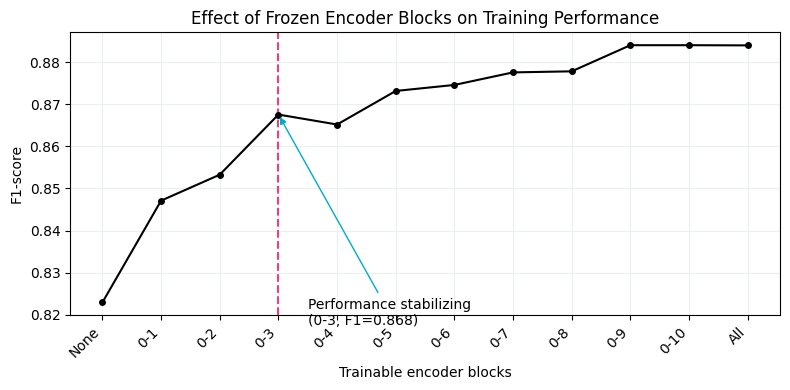

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

# figure Í∞ùÏ≤¥Î•º ÎßåÎì≠ÎãàÎã§.
plt.figure(figsize=(8,4))

# Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§.
x = [f"0-{index}" for index in range(12)]
x[0] = "None"
x[-1] = "All"
y = scores[::-1]

# Ïà´Ïûê xÏ∂ï (KneeLocatorÏö©)
x_values = list(range(len(y)))

# KneeLocatorÎ°ú ÏûêÎèôÏúºÎ°ú ÏµúÏ†ÅÏ†ê Ï∞æÍ∏∞
kn = KneeLocator(
    x_values,
    y,
    curve='concave',      # ÏúÑÎ°ú Î≥ºÎ°ùÌïú Í≥°ÏÑ†
    direction='increasing' # Ï¶ùÍ∞ÄÌïòÎäî Î∞©Ìñ•
)
optimal_point = kn.elbow

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.grid(color='#ECEFF1')

# ÏûêÎèôÏúºÎ°ú Ï∞æÏùÄ ÏµúÏ†ÅÏ†êÏóê ÏÑ† Í∑∏Î¶¨Í∏∞
plt.axvline(x=optimal_point, color="#EC407A", linestyle="--")

plt.title("Effect of Frozen Encoder Blocks on Training Performance")
plt.ylabel("F1-score")
plt.xlabel("Trainable encoder blocks")

# Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
plt.plot(x_values, y, color="black", marker='o', markersize=4)

# Í∑∏ÎûòÌîÑ Ï£ºÏÑù Ï∂îÍ∞Ä (ÏûêÎèôÏúºÎ°ú Ï∞æÏùÄ ÏßÄÏ†ê)
plt.annotate(
    f'Performance stabilizing\n({x[optimal_point]}, F1={y[optimal_point]:.3f})',
    xy=(optimal_point, y[optimal_point]),
    xytext=(optimal_point+0.5, y[optimal_point]-.05),
    arrowprops=dict(
        arrowstyle="-|>",
        connectionstyle="arc3",
        color="#00ACC1")
)

# xÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.xticks(x_values, x, rotation=45, ha='right')

plt.tight_layout()
plt.savefig("multiple_frozen_blocks.png", dpi=300, bbox_inches='tight')

# Í≤∞Í≥º Ï∂úÎ†•
print(f"- ÏûêÎèô ÌÉêÏßÄÎêú ÏµúÏ†Å ÎèôÍ≤∞ ÏßÄÏ†ê: {x[optimal_point]}")
print(f"- Ìï¥Îãπ F1-score: {y[optimal_point]:.4f}")
print(f"- Ï†ÑÏ≤¥ ÌïôÏäµ(All) ÎåÄÎπÑ ÏÑ±Îä•: {y[optimal_point]/y[-1]*100:.1f}%")
print(f"- ÌïôÏäµ Î†àÏù¥Ïñ¥ ÎπÑÏú®: {(optimal_point+1)/12*100:.1f}%")



---



## **Ìì®-ÏÉ∑ Î∂ÑÎ•ò**

- **Few-Shot Î∂ÑÎ•ò** (Few-Shot Classification)
    - Ï†ÅÏùÄ ÏàòÏùò ÏòàÏ†ú(few examples)ÎßåÏúºÎ°úÎèÑ ÏÉàÎ°úÏö¥ ÌÅ¥ÎûòÏä§Î•º Î∂ÑÎ•òÌï† Ïàò ÏûàÍ≤å ÌïôÏäµÌïòÎäî Î∞©Î≤ï
        - ÏùºÎ∞ò ÌïôÏäµ: ÌÅ¥ÎûòÏä§Îãπ ÏàòÏ≤ú~ÏàòÎßå Í∞ú
        - Few-Shot ÌïôÏäµ : ÌÅ¥ÎûòÏä§Îãπ 1~10Í∞ú
    - ÏÇ¨ÎûåÏù¥ ÎèôÎ¨º ÏÇ¨ÏßÑ 1Ïû•Îßå Î≥¥Í≥† ÏÉàÎ°úÏö¥ ÎèôÎ¨ºÏùÑ Ïù∏ÏãùÌïòÎäî Í≤ÉÏ≤òÎüº,AIÎèÑ Ï†ÅÏùÄ ÏòàÏ†úÎ°ú ÏÉàÎ°úÏö¥ Í≤ÉÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÍ≤å ÎßåÎìúÎäî Í∏∞Ïà†
    - Î™©Ìëú = Îπ†Î•∏ Ï†ÅÏùëÎ†• (Quick Adaptation)
    - Î∞©Î≤ï = Î©îÌÉÄ Îü¨Îãù + Ïú†ÏÇ¨ÎèÑ ÌïôÏäµ


### **Setfit**
- https://huggingface.co/docs/setfit/index
- Ï†ÅÏùÄ ÏñëÏùò Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ÎßåÏúºÎ°ú Î¨∏Ïû• Î≥ÄÌôò(**Sentence Transformer**) Î™®Îç∏ÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÌååÏù∏ÌäúÎãùÌïòÍ∏∞ ÏúÑÌïú ÌîÑÎ†àÏûÑÏõåÌÅ¨

- **SetFit ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ∏ Îã®Í≥Ñ**
    1. **ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ**
        - Î†àÏù¥Î∏îÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Í∞ôÏùÄ ÌÅ¥ÎûòÏä§ÎÅºÎ¶¨ Î¨∂Í±∞ÎÇò Îã§Î•∏ ÌÅ¥ÎûòÏä§ÎÅºÎ¶¨ Î¨∂Ïñ¥ÏÑú (ÎπÑÏä∑Ìïú) ÏñëÏÑ± Î¨∏Ïû• ÏåçÍ≥º (ÎπÑÏä∑ÌïòÏßÄ ÏïäÏùÄ) ÏùåÏÑ± Î¨∏Ïû• ÏåçÏùÑ ÏÉùÏÑ±
    2. **ÏûÑÎ≤†Îî© ÎØ∏ÏÑ∏ ÌäúÎãù**
        - ÏïûÏÑú ÏÉùÏÑ±Ìïú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú ÏûÑÎ≤†Îî© Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ ÌäúÎãùÌï®
    3. **Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®**
        - ÏûÑÎ≤†Îî© Î™®Îç∏ ÏúÑÏóê Î∂ÑÎ•ò Ìó§ÎìúÎ•º ÎÜìÍ≥† ÏïûÏÑú ÏÉùÏÑ±Ìïú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ ÌõàÎ†®Ìï®

#### **ÏùºÎ∞ò Î∂ÑÎ•ò vs SetFit Ï∞®Ïù¥**
---
#### ÏùºÎ∞ò Î∂ÑÎ•ò Î∞©Ïãù (Supervised Classification)
- **ÌïôÏäµ Î∞©Ïãù**: Í∞Å Î¨∏Ïû•Í≥º Ï†ïÎãµ ÎùºÎ≤®ÏùÑ ÏßÅÏ†ë Îß§Ïπ≠ÌïòÏó¨ ÌïôÏäµ
  * Ïòà: "ÏòÅÌôî Ï¢ãÏïÑÏöî" ‚Üí Í∏çÏ†ï(1), "ÏòÅÌôî Î≥ÑÎ°ú" ‚Üí Î∂ÄÏ†ï(0)
- **ÏÜêÏã§ Ìï®Ïàò**: CrossEntropy Loss
  * Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÌôïÎ•†Í≥º Ï†ïÎãµ ÎùºÎ≤®Ïùò Ï∞®Ïù¥Î•º ÏµúÏÜåÌôî
- **ÌïÑÏöî Îç∞Ïù¥ÌÑ∞**: ÎùºÎ≤®Îãπ ÏàòÏ≤ú~ÏàòÎßå Í∞úÏùò ÏòàÏãú ÌïÑÏöî
  * Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Ï∂©Î∂ÑÌïú Î≥ÄÌòï(variation)ÏùÑ ÌïôÏäµÌï¥Ïïº Ìï®
- **Îã®Ï†ê**: Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Í≥ºÏ†ÅÌï© Î∞úÏÉù Ïâ¨ÏõÄ
  * 10Í∞ú ÏòàÏãúÎ°úÎäî Ìå®ÌÑ¥ ÌïôÏäµ Î∂àÍ∞ÄÎä•, ÏïîÍ∏∞Îßå Ìï®
---
#### SetFit Î∞©Ïãù (Contrastive Learning)
- **ÌïôÏäµ Î∞©Ïãù**: Î¨∏Ïû• Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í¥ÄÍ≥ÑÎ•º ÌïôÏäµ
  * Í∞ôÏùÄ ÌÅ¥ÎûòÏä§ Î¨∏Ïû• Ïåç ‚Üí "Ïù¥ ÎëòÏùÄ ÎπÑÏä∑Ìï¥" (ÏñëÏÑ± Ïåç)
  * Îã§Î•∏ ÌÅ¥ÎûòÏä§ Î¨∏Ïû• Ïåç ‚Üí "Ïù¥ ÎëòÏùÄ Îã¨Îùº" (ÏùåÏÑ± Ïåç)
- **Ïåç ÏÉùÏÑ±ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï¶ùÌè≠** (triplet ‚ùå, pair Î∞©Ïãù)
  - Ï¥ù 32Î¨∏Ïû• (2Í∞ú ÌÅ¥ÎûòÏä§, ÌÅ¥ÎûòÏä§Îãπ 16Í∞ú)
  - Í∞Å Î¨∏Ïû•Îãπ positive pair, negative pair (2Í∞ú)
  - pair ÏÉòÌîåÎßÅ ÏÉùÏÑ± Î∞òÎ≥µ ÌöüÏàò = 20
  - 32 * 2 * 20 = 1,280 Í∞ú
  - 32Í∞ú -> 1,280 Í∞úÎ°ú Ï¶ùÌè≠
- **ÏÜêÏã§ Ìï®Ïàò**: Contrastive Loss
  * Í∞ôÏùÄ ÌÅ¥ÎûòÏä§: Î≤°ÌÑ∞ Í∞Ñ Í±∞Î¶¨Î•º Í∞ÄÍπåÏù¥ (minimize)
  * Îã§Î•∏ ÌÅ¥ÎûòÏä§: Î≤°ÌÑ∞ Í∞Ñ Í±∞Î¶¨Î•º Î©ÄÍ≤å (maximize)
  * Loss = max(0, d(ÏñëÏÑ± Ïåç) - d(ÏùåÏÑ± Ïåç) + margin)
- **Î≤°ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÎ¶¨**:
  * Í∞ôÏùÄ ÎùºÎ≤® ‚Üí ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î≠âÏπ®
  * Îã§Î•∏ ÎùºÎ≤® ‚Üí ÏÑúÎ°ú Î©ÄÏñ¥Ïßê
  * Í≤∞Í≥º: Î™ÖÌôïÌïòÍ≤å Íµ¨Î∂ÑÎêòÎäî Í≥µÍ∞Ñ ÌòïÏÑ±
- **Î∂ÑÎ•ò Îã®Í≥Ñ**:
  * Ï†ïÎ¶¨Îêú Î≤°ÌÑ∞ Í≥µÍ∞ÑÏóê Í∞ÑÎã®Ìïú Î∂ÑÎ•òÍ∏∞(Logistic Regression) Ï∂îÍ∞Ä
  * Ïù¥ÎØ∏ Í≥µÍ∞ÑÏù¥ Ïûò Ï†ïÎ¶¨ÎêòÏñ¥ ÏûàÏñ¥ Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Î°úÎèÑ Ï∂©Î∂Ñ
- **Ïû•Ï†ê**:
  * Ïåç ÏÉùÏÑ±ÏúºÎ°ú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï¶ùÌè≠
  * Ïú†ÏÇ¨ÎèÑ ÌïôÏäµÏù¥ ÎùºÎ≤® ÏòàÏ∏°Î≥¥Îã§ Ïâ¨ÏõÄ
  * ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Sentence Transformer ÌôúÏö©ÏúºÎ°ú Îπ†Î•∏ ÏàòÎ†¥

### **SetFit: ÏÜåÎüâÏùò ÏÉòÌîåÎ°ú Ìö®Ïú®Ï†ÅÏù∏ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞**

In [ ]:
!pip install setfit

In [ ]:
from setfit import sample_dataset

# Ìì®-ÏÉ∑ ÏÑ§Ï†ïÏùÑ ÌùâÎÇ¥ÎÇ¥Í∏∞ ÏúÑÌï¥ ÌÅ¥ÎûòÏä§ÎßàÎã§ 16Í∞úÏùò ÏÉòÌîåÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§. (Ï¥ù 32Í∞ú)
sampled_train_data = sample_dataset(train_data, num_samples=16, seed = 42)
sampled_train_data

Dataset({
    features: ['Unnamed: 0', 'id', 'document', 'label'],
    num_rows: 32
})

- jhgan/ko-sroberta-multitask :
  - Sentence-RoBERTa (ÏûÑÎ≤†Îî© ÌäπÌôî)
  - KorNLI, KorSTS Îì± Îã§Ï§ë ÌÉúÏä§ÌÅ¨ ÌïôÏäµ
  - Contrastive Learning Í∏∞Î∞ò
  - ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ ÏµúÍ≥† ÏÑ±Îä•

#### Ïôú Î™®Îç∏Ïù¥ Îã§Î•ºÍπå?

### Layer Freezing: klue/bert-base
```
Îç∞Ïù¥ÌÑ∞: 8,500Í∞ú (Ï∂©Î∂Ñ)
ÌïôÏäµ: ÏßÅÏ†ë Î∂ÑÎ•ò (ÎùºÎ≤® ÏòàÏ∏°)
Î™©Ï†Å: Î≤îÏö© ‚Üí ÌäπÌôî

‚Üí Î≤îÏö© BERTÎ°ú Ï∂©Î∂ÑÌûà ÌïôÏäµ Í∞ÄÎä•
```

### Few-shot: jhgan/ko-sroberta-multitask
```
Îç∞Ïù¥ÌÑ∞: 32Í∞ú (Îß§Ïö∞ Ï†ÅÏùå!)
ÌïôÏäµ: Ïú†ÏÇ¨ÎèÑ Í∏∞Î∞ò (Contrastive)
Î™©Ï†Å: ÏûÑÎ≤†Îî© ÌíàÏßàÏù¥ ÌïµÏã¨

‚Üí Ïù¥ÎØ∏ Ï¢ãÏùÄ ÏûÑÎ≤†Îî© ÌïÑÏàò!
```

---

## ÌïµÏã¨ Ï∞®Ïù¥

| | Layer Freezing | Few-shot |
|---|---|---|
| Îç∞Ïù¥ÌÑ∞ | ÎßéÏùå (8.5K) | Ï†ÅÏùå (32) |
| Î™®Îç∏ ÏùòÏ°¥ÎèÑ | ÎÇÆÏùå | **Îß§Ïö∞ ÎÜíÏùå** |
| ÌïÑÏöî Îä•Î†• | Î∂ÑÎ•ò | **ÏûÑÎ≤†Îî©** |

**Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ = Îçî Ï¢ãÏùÄ Ï∂úÎ∞úÏ†ê ÌïÑÏöî!**

jhgan/ko-sroberta-multitaskÎäî:
- ‚úÖ Sentence Transformer (ÏûÑÎ≤†Îî© ÌäπÌôî)
- ‚úÖ Contrastive Learning (Few-shotÍ≥º ÎèôÏùº)
- ‚úÖ Îã§Ï§ë ÌÉúÏä§ÌÅ¨ ÌïôÏäµ (Î≤îÏö©ÏÑ±)

‚Üí 32Í∞úÎ°úÎèÑ ÎÜíÏùÄ ÏÑ±Îä•

In [ ]:
from setfit import SetFitModel

# ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú SentenceTransformer Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§.
# Î∂ÑÎ•ò Ìó§Îìú(Î∂ÑÎ•òÍ∏∞)Î•º ÏßÅÏ†ë ÏßÄÏ†ïÌïòÏßÄ ÏïäÏúºÎ©¥, default LogisticRegression ÏÇ¨Ïö©Ìï®
model = SetFitModel.from_pretrained("jhgan/ko-sroberta-multitask")


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
# Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
print("=" * 70)
print("SetFit Î™®Îç∏ Ï†ÑÏ≤¥ Íµ¨Ï°∞")
print("=" * 70)

# 1. model_body (Sentence Transformer) ÌååÎùºÎØ∏ÌÑ∞
print("\n[Part 1] model_body (Sentence Transformer) ÌååÎùºÎØ∏ÌÑ∞:")
print("-" * 70)

i = 0
for name, param in model.model_body.named_parameters():
    print(f'{i}: {name} ----- {param.requires_grad} --- {param.shape}')
    i += 1

print(f"\nÏ¥ù {i}Í∞ú ÌååÎùºÎØ∏ÌÑ∞")

# 2. model_head (Classifier) - sklearnÏù¥Îùº named_parameters ÏóÜÏùå
print("\n" + "=" * 70)
print("[Part 2] model_head (Classifier):")
print("-" * 70)

if model.model_head is not None:
    print(f"ÌÉÄÏûÖ: {type(model.model_head)}")

    # sklearn Î™®Îç∏Ïù¥ ÌïôÏäµÎêòÏóàÎã§Î©¥
    if hasattr(model.model_head, 'coef_'):
        print(f"Í∞ÄÏ§ëÏπò (coef_): {model.model_head.coef_.shape}")
        print(f"Ìé∏Ìñ• (intercept_): {model.model_head.intercept_.shape}")
        print(f"ÌÅ¥ÎûòÏä§: {model.model_head.classes_}")
    else:
        print("ÏïÑÏßÅ ÌïôÏäµÎêòÏßÄ ÏïäÏùå (coef_ ÏÜçÏÑ± ÏóÜÏùå)")
else:
    print("None (ÏïÑÏßÅ Ï¥àÍ∏∞Ìôî Ïïà Îê®)")

# 3. Ï†ÑÏ≤¥ ÏÜçÏÑ± ÌôïÏù∏
print("\n" + "=" * 70)
print("[Part 3] SetFit Î™®Îç∏Ïùò Î™®Îì† ÏÜçÏÑ±:")
print("-" * 70)

for attr_name, attr_value in vars(model).items():
    print(f"{attr_name}: {type(attr_value).__name__}")


SetFit Î™®Îç∏ Ï†ÑÏ≤¥ Íµ¨Ï°∞

[Part 1] model_body (Sentence Transformer) ÌååÎùºÎØ∏ÌÑ∞:
----------------------------------------------------------------------
0: 0.auto_model.embeddings.word_embeddings.weight ----- True --- torch.Size([32000, 768])
1: 0.auto_model.embeddings.position_embeddings.weight ----- True --- torch.Size([514, 768])
2: 0.auto_model.embeddings.token_type_embeddings.weight ----- True --- torch.Size([1, 768])
3: 0.auto_model.embeddings.LayerNorm.weight ----- True --- torch.Size([768])
4: 0.auto_model.embeddings.LayerNorm.bias ----- True --- torch.Size([768])
5: 0.auto_model.encoder.layer.0.attention.self.query.weight ----- True --- torch.Size([768, 768])
6: 0.auto_model.encoder.layer.0.attention.self.query.bias ----- True --- torch.Size([768])
7: 0.auto_model.encoder.layer.0.attention.self.key.weight ----- True --- torch.Size([768, 768])
8: 0.auto_model.encoder.layer.0.attention.self.key.bias ----- True --- torch.Size([768])
9: 0.auto_model.encoder.layer.0.attention.s

#### **AutoModelForSequenceClassification vs SetFitModel Íµ¨Ï°∞ Ï∞®Ïù¥**

#### AutoModelForSequenceClassification
```
embeddings.word_embeddings.weight
embeddings.position_embeddings.weight
embeddings.token_type_embeddings.weight
embeddings.LayerNorm.weight
embeddings.LayerNorm.bias
encoder.layer.0.attention.self.query.weight
encoder.layer.0.attention.self.key.weight
...
encoder.layer.11.output.dense.weight
encoder.layer.11.output.LayerNorm.bias
pooler.dense.weight
pooler.dense.bias
classifier.weight  ‚Üê PyTorch Linear Î†àÏù¥Ïñ¥
classifier.bias
```
- **Îã®Ïùº PyTorch Î™®Îç∏**: ÏûÑÎ≤†Îî©Î∂ÄÌÑ∞ Î∂ÑÎ•òÍπåÏßÄ Î™®Îëê PyTorch
- **Ï†ÑÏ≤¥ 110M+ ÌååÎùºÎØ∏ÌÑ∞**Í∞Ä ÌïòÎÇòÏùò Î™®Îç∏Ïóê Ìè¨Ìï®
- `named_parameters()`Î°ú Î™®Îì† Î†àÏù¥Ïñ¥ ÌôïÏù∏ Í∞ÄÎä•
- **Î∂ÑÎ•ò Ìó§Îìú**: PyTorch Linear Î†àÏù¥Ïñ¥ (ÌïôÏäµ Í∞ÄÎä•)

---

### SetFitModel
```
model_body (Sentence Transformer):
  0.auto_model.embeddings.word_embeddings.weight
  0.auto_model.embeddings.position_embeddings.weight
  ...
  0.auto_model.encoder.layer.11.output.LayerNorm.weight
  0.auto_model.encoder.layer.11.output.LayerNorm.bias
  0.auto_model.encoder.relative_attention_bias.weight
  0.auto_model.pooler.dense.weight  ‚Üê Pooler (Ïó¨Í∏∞ÏÑú ÎÅù)
  0.auto_model.pooler.dense.bias
  (Pooling Î†àÏù¥Ïñ¥Îäî ÌååÎùºÎØ∏ÌÑ∞ ÏóÜÏùå - mean pooling)

model_head (Classifier):
  sklearn.LogisticRegression
  - coef_: ndarray shape (num_classes, 768)
  - intercept_: ndarray shape (num_classes,)
```
- **2Îã®Í≥Ñ Î∂ÑÎ¶¨ Íµ¨Ï°∞**:
  - `model_body`: Sentence Transformer (PyTorch, PoolerÍπåÏßÄ Ìè¨Ìï®)
  - `model_head`: LogisticRegression (sklearn, NumPy)
- **PoolerÍπåÏßÄÎßå** PyTorch ÌååÎùºÎØ∏ÌÑ∞
- **Î∂ÑÎ•ò Ìó§Îìú**: sklearn Î™®Îç∏ (NumPy Î∞∞Ïó¥, `named_parameters()` Î∂àÍ∞Ä)
- Pooling Î†àÏù¥Ïñ¥Îäî ÌååÎùºÎØ∏ÌÑ∞ ÏóÜÎäî Ïó∞ÏÇ∞Îßå ÏàòÌñâ (mean pooling)

---

### ÌïµÏã¨ Ï∞®Ïù¥

| Íµ¨Î∂Ñ | AutoModel | SetFit |
|------|-----------|--------|
| Íµ¨Ï°∞ | Îã®Ïùº PyTorch | PyTorch + sklearn |
| ÎßàÏßÄÎßâ ÌïôÏäµ Í∞ÄÎä• Î†àÏù¥Ïñ¥ | classifier | pooler |
| Î∂ÑÎ•òÍ∏∞ | Linear (torch.nn) | LogisticRegression (sklearn) |
| ÌååÎùºÎØ∏ÌÑ∞ ÌôïÏù∏ | `named_parameters()` Ï†ÑÏ≤¥ | `model_body.named_parameters()` Îßå |
| ÌïôÏäµ Î∞©Ïãù | ÏóîÎìú-Ìà¨-ÏóîÎìú | 2Îã®Í≥Ñ (Contrastive ‚Üí Î∂ÑÎ•ò) |

#### Few-Shot fine-tuning ÌïòÍ∏∞ Ï†Ñ

In [ ]:
# 1. ÏÇ¨Ï†ÑÌïôÏäµ Î™®Îç∏ Í∑∏ÎåÄÎ°ú (baseline)
model_base = AutoModelForSequenceClassification.from_pretrained(
    "jhgan/ko-sroberta-multitask",
    num_labels=2
)
tokenizer = AutoTokenizer.from_pretrained("jhgan/ko-sroberta-multitask")

tokenized_train = sampled_train_data.map(preprocess_function, batched=True)
tokenized_test = test_data.map(preprocess_function, batched=True)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at jhgan/ko-sroberta-multitask and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# ÏùºÎ∞ò ÌååÏù∏ÌäúÎãù
trainer_base = Trainer(
    model=model_base,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)
trainer_base.train()
metrics_base = trainer_base.evaluate()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


In [ ]:
trainer_base.evaluate()
# 0.88 (8500Í∞ú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú)
# 0.654 (few-shot ÌõàÎ†®Ïö© ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î°ú)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


{'eval_loss': 0.6849080324172974,
 'eval_f1': 0.6543385490753911,
 'eval_runtime': 1.4966,
 'eval_samples_per_second': 668.194,
 'eval_steps_per_second': 42.096,
 'epoch': 1.0}

In [ ]:
# model head ÌôïÏù∏ÌïòÍ∏∞
model.model_head

# Î™®Îç∏Ïù¥ ÌïôÏäµÎêòÏßÄ ÏïäÏïÑÏÑú Ï£ºÌô©ÏÉâÏúºÎ°ú ÎÇòÌÉÄÎÇ®
# ÌïôÏäµÌïú ÏÉÅÌÉúÎäî ÌïòÎäòÏÉâ

LogisticRegression()

#### Few-shot fine-tuning Ìïú ÌõÑ

In [ ]:
from setfit import TrainingArguments as SetFitTrainingArguments
from setfit import Trainer as SetFitTrainer

# ÌõàÎ†® Îß§Í∞úÎ≥ÄÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
args = SetFitTrainingArguments(
    num_epochs=3,      # ÎåÄÏ°∞ ÌïôÏäµÏùÑ ÏàòÌñâÌï† ÏóêÌè¨ÌÅ¨ ÌöüÏàò
    num_iterations=30,  # Ìïú ÏóêÌè¨ÌÅ¨Îãπ pair ÏÉòÌîåÎßÅ ÏÉùÏÑ± Î∞òÎ≥µ ÌöüÏàò (32 * 2 * num_iterations)
    # batch_size = 16 (default)
)
args.eval_strategy = args.evaluation_strategy

# Trainer Í∞ùÏ≤¥Î•º ÎßåÎì≠ÎãàÎã§.
trainer = SetFitTrainer(
    model=model,
    args=args,
    train_dataset=sampled_train_data,
    eval_dataset=test_data,
    metric="f1",
    column_mapping={"document": "text"}  # default required columns = ['text', 'label']
)


Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [ ]:
# ÌõàÎ†® Î£®ÌîÑ
trainer.train()

# wandb(Weights & Biases):
# Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïùò ÌõàÎ†® Í≥ºÏ†ï(ÏÜêÏã§, Ï†ïÌôïÎèÑ Îì±)Í≥º Í≤∞Í≥ºÎ¨ºÏùÑ ÏûêÎèôÏúºÎ°ú Í∏∞Î°ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÏó¨
# Ïã§ÌóòÏùÑ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Í¥ÄÎ¶¨ÌïòÍ≥† Îã§Î•∏ Ïã§ÌóòÍ≥º ÎπÑÍµêÌï† Ïàò ÏûàÍ≤å ÎèÑÏôÄÏ£ºÎäî MLOps(Í∏∞Í≥Ñ ÌïôÏäµ Ïö¥ÏòÅ) ÎèÑÍµ¨

***** Running training *****
  Num unique pairs = 1920
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
trainer.evaluate()
# 0.78 - ÏÉòÌîåÎßÅ ÏÉùÏÑ± ÌöüÏàòÍ∞Ä 20Í∞úÏùºÎïå
# 0.75 - ÏÉòÌîåÎßÅ ÏÉùÏÑ± ÌöüÏàòÍ∞Ä 30Í∞úÏùºÎïå

***** Running evaluation *****
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


{'f1': 0.7577777777777778}

num_iterationsÎ≥Ñ ÏÑ±Îä• Ï∏°Ï†ï Ï§ë...


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 320
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations= 5: F1=0.7769


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 640
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=10: F1=0.7743


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 960
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=15: F1=0.7658


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 1280
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=20: F1=0.7818


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 1600
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=25: F1=0.7753


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 1920
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=30: F1=0.7844


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 2240
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=35: F1=0.7851


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.12/dist-packages/jupyter_cli

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 2560
  Batch size = 16
  Num epochs = 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:

num_iterations=40: F1=0.7816

ÏµúÏ†Å num_iterations: 35
ÏµúÍ≥† F1 Score: 0.7851


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/tmp/ipython-input-2722057952.py:70: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2722057952.py:70: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2722057952.py:70: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2722057952.py:70: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2722057952.py:70: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUN

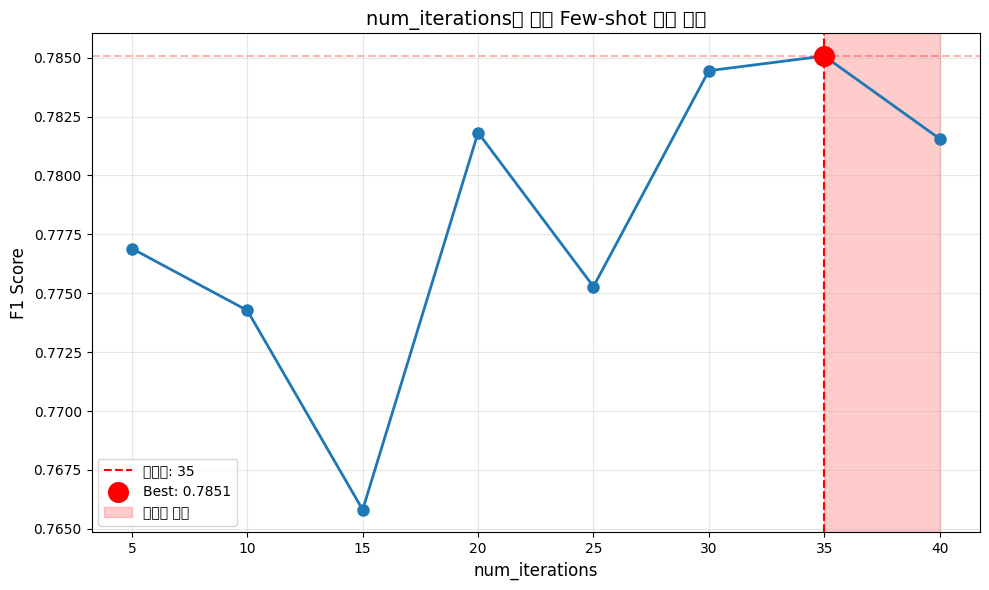


Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: fewshot_iterations_analysis.png


In [ ]:
import matplotlib.pyplot as plt

# Ïã§ÌóòÌï† num_iterations Î≤îÏúÑ
iterations_range = [5, 10, 15, 20, 25, 30, 35, 40]
f1_scores = []

print("=" * 50)
print("num_iterationsÎ≥Ñ ÏÑ±Îä• Ï∏°Ï†ï Ï§ë...")
print("=" * 50)

for n_iter in iterations_range:
    # Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    model = SetFitModel.from_pretrained("jhgan/ko-sroberta-multitask")

    # ÌïôÏäµ ÏÑ§Ï†ï
    args = SetFitTrainingArguments(
        num_epochs=3,
        num_iterations=n_iter,
        batch_size=16
    )

    # Trainer
    trainer = SetFitTrainer(
        model=model,
        args=args,
        train_dataset=sampled_train_data,
        eval_dataset=test_data,
        metric="f1",
        column_mapping={"document": "text"}
    )

    # ÌïôÏäµ Î∞è ÌèâÍ∞Ä
    trainer.train()
    metrics = trainer.evaluate()
    f1 = metrics['f1']
    f1_scores.append(f1)

    print(f"num_iterations={n_iter:2d}: F1={f1:.4f}")

# ÏµúÏ†ÅÍ∞í Ï∞æÍ∏∞
best_idx = f1_scores.index(max(f1_scores))
best_iter = iterations_range[best_idx]
best_f1 = f1_scores[best_idx]

print("\n" + "=" * 50)
print(f"ÏµúÏ†Å num_iterations: {best_iter}")
print(f"ÏµúÍ≥† F1 Score: {best_f1:.4f}")
print("=" * 50)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.plot(iterations_range, f1_scores, marker='o', linewidth=2, markersize=8)
plt.axvline(x=best_iter, color='r', linestyle='--', label=f'ÏµúÏ†ÅÍ∞í: {best_iter}')
plt.axhline(y=best_f1, color='r', linestyle='--', alpha=0.3)

# ÏµúÏ†ÅÏ†ê Í∞ïÏ°∞
plt.scatter([best_iter], [best_f1], color='red', s=200, zorder=5,
            label=f'Best: {best_f1:.4f}')

# Í≥ºÏ†ÅÌï© ÏòÅÏó≠ ÌëúÏãú
if best_idx < len(iterations_range) - 1:
    plt.axvspan(iterations_range[best_idx], iterations_range[-1],
                alpha=0.2, color='red', label='Í≥ºÏ†ÅÌï© ÏòÅÏó≠')

plt.xlabel('num_iterations', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('num_iterationsÏóê Îî∞Î•∏ Few-shot ÏÑ±Îä• Î≥ÄÌôî', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('fewshot_iterations_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nÍ∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: fewshot_iterations_analysis.png")

#### ÏµúÏ†Å num_iterations ÌäπÏ†ï Î∂àÍ∞Ä

### Ïã§Ìóò Í≤∞Í≥º
- ÌÖåÏä§Ìä∏ Î≤îÏúÑ: 5~40
- ÏµúÍ≥† ÏÑ±Îä•: 35 (F1: 0.785)
- Ìå®ÌÑ¥: Î∂àÍ∑úÏπôÌïú Îì±ÎùΩ

### ÌïúÍ≥Ñ
   - Îß§ Ïã§ÌñâÎßàÎã§ Ïåç ÏÉùÏÑ±Ïù¥ ÎûúÎç§
   - ÎèôÏùº ÏÑ§Ï†ïÎèÑ Í≤∞Í≥º Îã¨ÎùºÏßà Ïàò ÏûàÏùå
    - **ÎÜíÏùÄ ÎÖ∏Ïù¥Ï¶àÎ°ú Ïù∏Ìï¥ ÏµúÏ†ÅÍ∞í ÌäπÏ†ï Ïñ¥Î†§ÏõÄ**

In [ ]:
model.model_head # Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®Ïù¥ ÏôÑÎ£åÎêòÎ©¥ ÌååÎûÄÏÉâ

LogisticRegression()



---



## **ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅ** (MLM)

### **ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú (BERT)Î™®Îç∏ Í≥ÑÏÜç ÌõàÎ†®ÌïòÎäî Î∞©Î≤ï**

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

# Î™®Îç∏: klue/bert-base
model_id = "klue/bert-base"
model = AutoModelForMaskedLM.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def preprocess_function(examples):
   return tokenizer(examples["document"], truncation=True)

# Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌï©ÎãàÎã§.
tokenized_train = train_data.map(preprocess_function, batched=True)
tokenized_train = tokenized_train.remove_columns("label")
tokenized_test = test_data.map(preprocess_function, batched=True)
tokenized_test = tokenized_test.remove_columns("label")

Map:   0%|          | 0/8500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

- ÎßàÏä§ÌÇπ Î∞©Î≤ï
    - ÌÜ†ÌÅ∞ ÎßàÏä§ÌÇπ : Îã®Ïñ¥ ÎßàÏä§ÌÇπÎ≥¥Îã§Îäî ÎπÑÍµêÏ†Å Îπ†Î•∏ ÏàòÎ†¥
    - Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎßàÏä§ÌÇπ : Ï†ïÎ£åÌïòÏßÄÎßå Î≥µÏû°ÌïòÍ≥† ÎäêÎ¶¨Îã§
- ÌÜ†ÌÅ∞ ÎßàÏä§ÌÇπ
    - Î¨∏Ïû•Ïóê ÏûàÎäî ÌÜ†ÌÅ∞Ïùò 15%Î•º ÎûúÎç§ÌïòÍ≤å ÎßàÏä§ÌÇπÌï®
    - Îã®Ïñ¥Ïùò ÏùºÎ∂ÄÎ∂ÑÎßå ÎßàÏä§ÌÇπ Îê† Ïàò ÏûàÎã§.

In [ ]:
from transformers import DataCollatorForLanguageModeling

# ÌÜ†ÌÅ∞ ÎßàÏä§ÌÇπ
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

In [ ]:
# from transformers import DataCollatorForWholeWordMask

# # Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎßàÏä§ÌÇπ
# data_collator = DataCollatorForWholeWordMask(
#     tokenizer=tokenizer,
#     mlm=True,
#     mlm_probability=0.15
# )

In [ ]:
# ÌõàÎ†® Îß§Í∞úÎ≥ÄÏàò
training_args = TrainingArguments(
   "model",
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=1,
   weight_decay=0.01,
   save_strategy="epoch",
   report_to="none"
)

# Trainer Í∞ùÏ≤¥ ÏÉùÏÑ±
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    processing_class=tokenizer,
    data_collator=data_collator
)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


In [ ]:
# ÌõàÎ†® ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶º(T4 20Î∂Ñ Ïù¥ÏÉÅ)
# ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§.
tokenizer.save_pretrained("mlm")

# Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï©ÎãàÎã§.
trainer.train()

# ÏóÖÎç∞Ïù¥Ìä∏Îêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
model.save_pretrained("mlm")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


- **Mask ÏòàÏ∏° Í≤∞Í≥º ÌôïÏù∏: (ÏõêÎ≥∏ Î™®Îç∏)**

In [ ]:
from transformers import pipeline

# Î™®Îç∏ÏùÑ Î°úÎìúÌïòÍ≥† ÏòàÏ∏°ÏùÑ ÎßåÎì≠ÎãàÎã§.
mask_filler = pipeline("fill-mask", model="klue/bert-base")
preds = mask_filler("Ïä§ÌÜ†Î¶¨Í∞Ä [MASK]ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.")

# Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
for pred in preds:
    print(f">>> {pred['sequence']}")

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÎÑàÎ¨¥ ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Ïûà ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÏõåÎÇô ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Î≥ÑÎ°ú ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.


- **Mask ÏòàÏ∏° Í≤∞Í≥º ÌôïÏù∏: (ÏóÖÎç∞Ïù¥Ìä∏Îêú Î™®Îç∏)**

- ÏòÅÌôîÎ¶¨Î∑∞ ÌïôÏäµÏùÑ ÌÜµÌï¥ ÎèÑÎ©îÏù∏ ÌäπÌôî Ïñ¥ÌúòÏôÄ ÌèâÍ∞Ä ÌëúÌòÑÏù¥ ÌÅ¨Í≤å Í∞úÏÑ†
- Î¨∏Îß•Ï†Å ÎÖºÎ¶¨ÏÑ±Í≥º Î¨∏Î≤ïÏ†Å ÏôÑÏÑ±ÎèÑÎäî Ï∂îÍ∞Ä Í∞úÏÑ†Ïù¥ ÌïÑÏöî

In [ ]:
# Î™®Îç∏ÏùÑ Î°úÎìúÌïòÍ≥† ÏòàÏ∏°ÏùÑ ÎßåÎì≠ÎãàÎã§.
# ÎßàÏä§ÌÅ¨ ÏòàÏ∏° Í≤∞Í≥º Í∞úÏàò ÏßÄÏ†ï Î∞©Î≤ï
mask_filler = pipeline("fill-mask", model="mlm", top_k=10)
preds = mask_filler("Ïä§ÌÜ†Î¶¨Í∞Ä [MASK]ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.")

# Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
for pred in preds:
    print(f">>> {pred['sequence']}")

Device set to use cuda:0


>>> Ïä§ÌÜ†Î¶¨Í∞Ä Î≥ÑÎ°ú ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÎÑàÎ¨¥ ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Ïû¨ÎØ∏ ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÏµúÍ≥† ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Îõ∞Ïñ¥ÎÇò ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Î≠ê ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Ïßú ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä Ï¢ã ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÏßÑÏßú ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.
>>> Ïä§ÌÜ†Î¶¨Í∞Ä ÎÇ®Îã¨ ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.


- Í∏∞ÎåÄÌñàÎçò Í≤É

  "Ïä§ÌÜ†Î¶¨Í∞Ä [Ïû¨ÎØ∏ÏûàÏñ¥ÏÑú] ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§"

- Ïã§Ï†ú Í≤∞Í≥º  

  "Ïä§ÌÜ†Î¶¨Í∞Ä [Ïû¨ÎØ∏] ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§"

- ÏõêÏù∏: "Ïû¨ÎØ∏ÏûàÏñ¥ÏÑú"Í∞Ä Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌÜ†ÌÅ∞ÌôîÎê®

  - ÌÜ†ÌÅ∞Îì§ = ["Ïû¨ÎØ∏", "ÏûàÏñ¥ÏÑú"] ÎòêÎäî ["Ïû¨ÎØ∏", "##Ïûà", "##Ïñ¥ÏÑú"]
  - Î™®Îç∏ÏùÄ Ï≤´ Î≤àÏß∏ ÌÜ†ÌÅ∞ "Ïû¨ÎØ∏"Îßå ÏòàÏ∏°

In [ ]:
preds[:5]

[{'score': 0.3985593616962433,
  'token': 5429,
  'token_str': 'Î≥ÑÎ°ú',
  'sequence': 'Ïä§ÌÜ†Î¶¨Í∞Ä Î≥ÑÎ°ú ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.'},
 {'score': 0.11836191266775131,
  'token': 3760,
  'token_str': 'ÎÑàÎ¨¥',
  'sequence': 'Ïä§ÌÜ†Î¶¨Í∞Ä ÎÑàÎ¨¥ ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.'},
 {'score': 0.028566410765051842,
  'token': 4697,
  'token_str': 'Ïû¨ÎØ∏',
  'sequence': 'Ïä§ÌÜ†Î¶¨Í∞Ä Ïû¨ÎØ∏ ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.'},
 {'score': 0.02480860985815525,
  'token': 3841,
  'token_str': 'ÏµúÍ≥†',
  'sequence': 'Ïä§ÌÜ†Î¶¨Í∞Ä ÏµúÍ≥† ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.'},
 {'score': 0.01693551614880562,
  'token': 7999,
  'token_str': 'Îõ∞Ïñ¥ÎÇò',
  'sequence': 'Ïä§ÌÜ†Î¶¨Í∞Ä Îõ∞Ïñ¥ÎÇò ÎùºÏÑú ÏãúÍ∞Ñ Í∞ÄÎäî Ï§Ñ Î™∞ÎûêÎã§.'}]

In [ ]:
len(preds)

10



---



## **Í∞úÏ≤¥Î™Ö Ïù∏Ïãù**

- **Í∞úÏ≤¥Î™Ö Ïù∏Ïãù** (**NER** named-entity recognition)
- Ï†ÑÏ≤¥ Î¨∏ÏÑúÎ•º Î∂ÑÎ•òÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº **ÏÇ¨ÎûåÏù¥ÎÇò ÏúÑÏπò Îì±Ïù¥ Ìè¨Ìï®Îêú Í∞úÎ≥Ñ ÌÜ†ÌÅ∞Ïù¥ÎÇò Îã®Ïñ¥Î•º Î∂ÑÎ•ò**Ìï®
- ÎØºÍ∞êÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Îïå ÏùµÎ™ÖÌôîÌïòÎäî ÏûëÏóÖÏóê ÌäπÎ≥ÑÌûà ÎèÑÏõÄÎê®
- Í∞úÎ≥Ñ Îã®Ïñ¥Î•º Î∂ÑÎ•òÌïòÎäî Îç∞ Ï¥àÏ†êÏùÑ ÎßûÏ∂îÎ†§Î©¥ ÏÑ∏Î∂ÑÌôîÎêú Íµ¨Ï°∞Î•º Í≥†Î†§ÌïòÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨Ìï¥Ïïº ÌïúÎã§.
- Î∂ÑÎ•ò Î∞©Ïãù:
    - **Î™®Îç∏Ïù¥ ÏãúÌÄÄÏä§Ïóê ÏûàÎäî Í∞úÎ≥Ñ ÌÜ†ÌÅ∞Ïóê ÎåÄÌï¥ ÏòàÏ∏°**ÏùÑ ÎßåÎì†Îã§



In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
import numpy as np

In [ ]:

dataset = load_dataset("klue", "ner")

README.md: 0.00B [00:00, ?B/s]

ner/train-00000-of-00001.parquet:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

ner/validation-00000-of-00001.parquet:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 21008
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'ner_tags'],
        num_rows: 5000
    })
})

In [ ]:
example = dataset["train"][848]
example

{'sentence': 'ÎßàÏßÄÎßâ ÏòÅÌôî <1Î∂Ñ:TI>Ïù¥ Ïù¥ÏòÅÌôîÏóê ÎåÄÌïú ÎÇòÏùò Ïù∏ÏãùÏùÑ Î∞îÍø®Îã§.',
 'tokens': ['Îßà',
  'ÏßÄ',
  'Îßâ',
  ' ',
  'ÏòÅ',
  'Ìôî',
  ' ',
  '1',
  'Î∂Ñ',
  'Ïù¥',
  ' ',
  'Ïù¥',
  'ÏòÅ',
  'Ìôî',
  'Ïóê',
  ' ',
  'ÎåÄ',
  'Ìïú',
  ' ',
  'ÎÇò',
  'Ïùò',
  ' ',
  'Ïù∏',
  'Ïãù',
  'ÏùÑ',
  ' ',
  'Î∞î',
  'Íø®',
  'Îã§',
  '.'],
 'ner_tags': [12,
  12,
  12,
  12,
  12,
  12,
  12,
  10,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12]}

- **ner_tags** : Í∞úÏ≤¥Î™Ö ÌÉúÍ∑∏
    - ÏÇ¨Îûå(PER),Ï°∞ÏßÅ(ORG), ÏúÑÏπò(LOC), Í∏∞ÌÉÄÎß§Ï≤¥(MISC), Í∞úÏ≤¥ÏïÑÎãò(O)
    - Í∞úÏ≤¥ÎßàÎã§ B(ÏãúÏûë),I(Ï§ëÍ∞Ñ)

In [ ]:
label_list = dataset["train"].features["ner_tags"].feature.names
label2id = {l:i for i,l in enumerate(label_list)}
id2label = {i:l for l,i in label2id.items()}

In [ ]:
from transformers import AutoModelForTokenClassification

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î°úÎìúÌï©ÎãàÎã§.
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
model_id = "klue/bert-base"
# Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§.
model = AutoModelForTokenClassification.from_pretrained(
    model_id,
    num_labels=len(id2label),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä ÏÉòÌîåÏùÑ Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ï ÌôïÏù∏

In [ ]:
example["tokens"]

['Îßà',
 'ÏßÄ',
 'Îßâ',
 ' ',
 'ÏòÅ',
 'Ìôî',
 ' ',
 '1',
 'Î∂Ñ',
 'Ïù¥',
 ' ',
 'Ïù¥',
 'ÏòÅ',
 'Ìôî',
 'Ïóê',
 ' ',
 'ÎåÄ',
 'Ìïú',
 ' ',
 'ÎÇò',
 'Ïùò',
 ' ',
 'Ïù∏',
 'Ïãù',
 'ÏùÑ',
 ' ',
 'Î∞î',
 'Íø®',
 'Îã§',
 '.']

In [ ]:
# Í∞úÎ≥Ñ ÌÜ†ÌÅ∞ÏùÑ Î∂ÄÎ∂Ñ ÌÜ†ÌÅ∞ÏúºÎ°ú ÎÇòÎàïÎãàÎã§.
token_ids = tokenizer(example["tokens"], is_split_into_words=True)["input_ids"]
sub_tokens = tokenizer.convert_ids_to_tokens(token_ids)
sub_tokens

# is_split_into_words=True: ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä Îã®Ïñ¥ Î¶¨Ïä§Ìä∏Î°ú Ï≤òÎ¶¨ÌïòÎèÑÎ°ù ÏßÄÏãú (NER ÎùºÎ≤® Ï†ïÎ†¨Ïóê Ïú†Î¶¨)
# ["input_ids"]: ÌÜ†ÌÅ∞ÌôîÎêú Í≤∞Í≥º Ï§ë Ï†ïÏàò ID ÏãúÌÄÄÏä§Îßå Í∫ºÎÉÑ

['[CLS]',
 'Îßà',
 'ÏßÄ',
 'Îßâ',
 'ÏòÅ',
 'Ìôî',
 '1',
 'Î∂Ñ',
 'Ïù¥',
 'Ïù¥',
 'ÏòÅ',
 'Ìôî',
 'Ïóê',
 'ÎåÄ',
 'Ìïú',
 'ÎÇò',
 'Ïùò',
 'Ïù∏',
 'Ïãù',
 'ÏùÑ',
 'Î∞î',
 'Íø®',
 'Îã§',
 '.',
 '[SEP]']

- align_labels
    - ÏûÖÎ†•ÏùÑ ÌÜ†ÌÅ∞ÏúºÎ°ú ÎÇòÎàÑÍ≥†, ÌÜ†ÌÅ∞ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Îêú Î†àÏù¥Î∏îÎ°ú Ï†ïÎ†¨ÌïòÎäî Ìï®Ïàò

In [ ]:
def align_labels(examples):
    # 1. ÌÜ†ÌÅ∞Îì§ÏùÑ Î¨∏Ïû•ÏúºÎ°ú Ïû¨Íµ¨ÏÑ±
    reconstructed_texts = []
    for tokens in examples["tokens"]:
        text = ''.join(tokens)
        reconstructed_texts.append(text)

    # 2. Ïû¨Íµ¨ÏÑ±Îêú Î¨∏Ïû•ÏúºÎ°ú ÌÜ†ÌÅ∞Ìôî
    tokenized_inputs = tokenizer(
        reconstructed_texts,
        truncation=True,
        padding=False,
        return_offsets_mapping=True  # Î¨∏Ïûê ÏúÑÏπò Ï†ïÎ≥¥ Ìè¨Ìï®
    )

    # 3. ÎùºÎ≤® Ï†ïÎ†¨
    aligned_labels = []

    for batch_idx, (original_tokens, original_labels, offsets) in enumerate(
        zip(examples["tokens"], examples["ner_tags"], tokenized_inputs["offset_mapping"])
    ):

        # ÏõêÎ≥∏ ÌÜ†ÌÅ∞Ïùò Î¨∏Ïûê ÏúÑÏπò Í≥ÑÏÇ∞
        char_to_original_token = {}
        char_pos = 0

        for token_idx, token in enumerate(original_tokens):
            for _ in range(len(token)):
                char_to_original_token[char_pos] = token_idx
                char_pos += 1

        # ÏÑúÎ∏åÌÜ†ÌÅ∞Î≥Ñ ÎùºÎ≤® Ìï†Îãπ
        labels = []
        for start, end in offsets:
            if start == end == 0:  # [CLS], [SEP] Îì± ÌäπÏàò ÌÜ†ÌÅ∞
                labels.append(-100)
            else:
                # Ìï¥Îãπ ÏúÑÏπòÏùò ÏõêÎ≥∏ ÌÜ†ÌÅ∞ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
                if start < len(char_to_original_token):
                    original_token_idx = char_to_original_token[start]
                    labels.append(original_labels[original_token_idx])
                else:
                    labels.append(-100)

        aligned_labels.append(labels)

    # offset_mapping Ï†úÍ±∞ (ÌïôÏäµÏóê Î∂àÌïÑÏöî)
    tokenized_inputs.pop("offset_mapping")
    tokenized_inputs["labels"] = aligned_labels

    return tokenized_inputs

In [ ]:
print("Îç∞Ïù¥ÌÑ∞ÏÖã Ïû¨Ï†ÑÏ≤òÎ¶¨ Ï§ë...")
tokenized_dataset = dataset.map(align_labels, batched=True)

# Í≤∞Í≥º ÌôïÏù∏
sample_idx = 848
print(f"\n=== ÏÉòÌîå {sample_idx} Ïû¨Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ===")
original_sample = dataset["train"][sample_idx]
processed_sample = tokenized_dataset["train"][sample_idx]

print(f"ÏõêÎ≥∏ Î¨∏Ïû•: {original_sample['sentence']}")
print(f"Ïû¨Íµ¨ÏÑ±Îêú Î¨∏Ïû•: {''.join(original_sample['tokens'])}")

# ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º ÌôïÏù∏
tokens = tokenizer.convert_ids_to_tokens(processed_sample['input_ids'])
labels = processed_sample['labels']

print(f"\nÌÜ†ÌÅ∞ vs ÎùºÎ≤®:")
for token, label in zip(tokens, labels):
    label_name = id2label[label] if label != -100 else "IGNORE"
    print(f"  {token:15} -> {label_name}")

Îç∞Ïù¥ÌÑ∞ÏÖã Ïû¨Ï†ÑÏ≤òÎ¶¨ Ï§ë...


Map:   0%|          | 0/21008 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]


=== ÏÉòÌîå 848 Ïû¨Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ===
ÏõêÎ≥∏ Î¨∏Ïû•: ÎßàÏßÄÎßâ ÏòÅÌôî <1Î∂Ñ:TI>Ïù¥ Ïù¥ÏòÅÌôîÏóê ÎåÄÌïú ÎÇòÏùò Ïù∏ÏãùÏùÑ Î∞îÍø®Îã§.
Ïû¨Íµ¨ÏÑ±Îêú Î¨∏Ïû•: ÎßàÏßÄÎßâ ÏòÅÌôî 1Î∂ÑÏù¥ Ïù¥ÏòÅÌôîÏóê ÎåÄÌïú ÎÇòÏùò Ïù∏ÏãùÏùÑ Î∞îÍø®Îã§.

ÌÜ†ÌÅ∞ vs ÎùºÎ≤®:
  [CLS]           -> IGNORE
  ÎßàÏßÄÎßâ             -> O
  ÏòÅÌôî              -> O
  1               -> B-TI
  ##Î∂Ñ             -> I-TI
  ##Ïù¥             -> O
  Ïù¥ÏòÅ              -> O
  ##Ìôî             -> O
  ##Ïóê             -> O
  ÎåÄÌïú              -> O
  ÎÇò               -> O
  ##Ïùò             -> O
  Ïù∏Ïãù              -> O
  ##ÏùÑ             -> O
  Î∞îÍø®              -> O
  ##Îã§             -> O
  .               -> O
  [SEP]           -> IGNORE


In [ ]:
!pip install seqeval

In [ ]:
import evaluate

# seqevalÏùÑ Î°úÎìúÌï©ÎãàÎã§.
seqeval = evaluate.load("seqeval")

# ÌèâÍ∞Ä Ìï®Ïàò
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=2)

    true_predictions = []
    true_labels = []

    for prediction, label in zip(predictions, labels):
        for token_prediction, token_label in zip(prediction, label):
            if token_label != -100:
                true_predictions.append([id2label[token_prediction]])
                true_labels.append([id2label[token_label]])

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {"f1": results["overall_f1"]}

In [ ]:
from transformers import DataCollatorForTokenClassification

# ÌÜ†ÌÅ∞ Î∂ÑÎ•ò DataCollator
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [ ]:
# ÌõàÎ†® ÏÑ§Ï†ï
training_args = TrainingArguments(
    "model_ner_ko",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,  # ÏóêÌè≠ Ïàò Ï¶ùÍ∞Ä
    weight_decay=0.01,
    save_strategy="epoch",
    eval_strategy="epoch",
    report_to="none",
    logging_steps=100
)

# Ìä∏Î†àÏù¥ÎÑà ÏÉùÏÑ±
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)
trainer.train()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/py

TrainOutput(global_step=2626, training_loss=0.056652990262742633, metrics={'train_runtime': 151.6937, 'train_samples_per_second': 276.979, 'train_steps_per_second': 17.311, 'total_flos': 1279297320963360.0, 'train_loss': 0.056652990262742633, 'epoch': 2.0})

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
trainer.evaluate()

{'eval_loss': 0.0722770169377327,
 'eval_f1': 0.9442410802436321,
 'eval_runtime': 11.1669,
 'eval_samples_per_second': 447.754,
 'eval_steps_per_second': 28.029,
 'epoch': 2.0}

- **Î™®Îç∏ Ï†ÄÏû• Î∞è Ï∂îÎ°† ÏàòÌñâ**

In [ ]:
from transformers import pipeline
from collections import defaultdict

# ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
trainer.save_model("ner_model-ko")



# ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Î™®Îç∏Î°ú Ï∂îÎ°†ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
token_classifier = pipeline(
    "token-classification",
    model="ner_model-ko",
    aggregation_strategy="simple"
)
text = """
2024ÎÖÑ 3Ïõî 15Ïùº Ïò§ÌõÑ 3ÏãúÏóê ÏÇºÏÑ±Ï†ÑÏûê ÏûÑÏßÅÏõê 500Î™ÖÏù¥ ÏÑúÏö∏ÎåÄÌïôÍµêÏóêÏÑú Ïó¥Î¶∞
'Ïù∏Í≥µÏßÄÎä•Í≥º ÎØ∏ÎûòÏÇ¨Ìöå' ÏÑ∏ÎØ∏ÎÇòÏóê Ï∞∏ÏÑùÌñàÎã§. Ïù¥ ÌñâÏÇ¨ÏóêÏÑú ÍπÄÏ≤†Ïàò ÍµêÏàòÎäî
Ï°∞ÏÑ†ÏãúÎåÄ Ïù¥ÏàúÏã† Ïû•Íµ∞Ïùò Î¶¨ÎçîÏã≠ÏùÑ ÌòÑÎåÄ Í≤ΩÏòÅÌïôÏóê Ï†ëÎ™©Ìïú Ïó∞Íµ¨Î•º Î∞úÌëúÌñàÏúºÎ©∞,
Íµ¨Í∏ÄÏΩîÎ¶¨ÏïÑ Î∞ïÏßÄÏòÅ ÎåÄÌëúÎäî 50ÏñµÏõê Í∑úÎ™®Ïùò AI Ìà¨Ïûê Í≥ÑÌöçÏùÑ Î∞úÌëúÌñàÎã§.
ÌñâÏÇ¨Ïû•Ïù∏ Î∂ÄÏÇ∞ Ìï¥Ïö¥ÎåÄ Î≤°Ïä§ÏΩîÏóêÏÑúÎäî ÏÇºÍ≤πÏÇ¥Í≥º ÍπÄÏπòÎ•º Ìè¨Ìï®Ìïú ÌïúÏãù Î∑îÌéòÍ∞Ä
Ï†úÍ≥µÎêòÏóàÍ≥†, Ï∞∏Í∞ÄÏûêÎì§ÏùÄ Í∞§Îü≠Ïãú Ïä§ÎßàÌä∏Ìè∞ÏúºÎ°ú QRÏΩîÎìúÎ•º Ïä§Ï∫îÌïòÏó¨
ÎîîÏßÄÌÑ∏ Î™ÖÌï®ÏùÑ ÍµêÌôòÌñàÎã§.
"""
result = token_classifier(text)
# Ïú†ÌòïÎ≥ÑÎ°ú Î∂ÑÎ•ò
entities_by_type = defaultdict(list)
for entity in result:
    entities_by_type[entity['entity_group']].append(entity['word'])

print("üè∑Ô∏è ÏóîÌã∞Ìã∞ Î∂ÑÎ•ò Í≤∞Í≥º:")
print("-" * 30)

for entity_type, words in sorted(entities_by_type.items()):
    print(f"{entity_type}: {', '.join(words)}")

Device set to use cuda:0


üè∑Ô∏è ÏóîÌã∞Ìã∞ Î∂ÑÎ•ò Í≤∞Í≥º:
------------------------------
DT: 2024ÎÖÑ 3Ïõî 15Ïùº, Ï°∞ÏÑ†ÏãúÎåÄ
LC: ÏÑúÏö∏ÎåÄÌïôÍµê, Î∂ÄÏÇ∞ Ìï¥Ïö¥ÎåÄ Î≤°Ïä§ÏΩî
OG: ÏÇºÏÑ±Ï†ÑÏûê, Íµ¨Í∏ÄÏΩîÎ¶¨ÏïÑ
PS: ÍπÄÏ≤†Ïàò, Ïù¥ÏàúÏã†, Î∞ïÏßÄÏòÅ
QT: 500Î™Ö, 50ÏñµÏõê
TI: Ïò§ÌõÑ 3Ïãú


klue_entities = {
    # Ïù∏Î¨º Í¥ÄÎ†®
    'PS': 'Person - Ïù∏Î™Ö (Î∞ïÏßÄÏÑ±, ÍπÄÏ≤†Ïàò, Ïù¥ÏàúÏã† Îì±)',
    
    # Ïû•ÏÜå Í¥ÄÎ†®  
    'LC': 'Location - ÏßÄÎ™Ö (ÏÑúÏö∏, Î∂ÄÏÇ∞, Îß®Ï≤¥Ïä§ÌÑ∞ Îì±)',
    
    # Í∏∞Í¥Ä Í¥ÄÎ†®
    'OG': 'Organization - Í∏∞Í¥ÄÎ™Ö (ÏÇºÏÑ±Ï†ÑÏûê, ÏÑúÏö∏ÎåÄÌïôÍµê, Îß®Ï≤¥Ïä§ÌÑ∞ Ïú†ÎÇòÏù¥Ìã∞Îìú Îì±)',
    
    # ÎÇ†Ïßú/ÏãúÍ∞Ñ
    'DT': 'Date/Time - ÎÇ†Ïßú/ÏãúÍ∞Ñ (2024ÎÖÑ, Ïò§Îäò, 3Ïãú Îì±)',
    
    # ÏàòÎüâ
    'QT': 'Quantity - ÏàòÎüâ (100Í∞ú, 50%, 3Î™Ö Îì±)',
    
    # Í∏∞ÌÉÄ Í≥†Ïú†Î™ÖÏÇ¨
    'CV': 'Civilization - Î¨∏Î™Ö/Î¨∏Ìôî (Ï°∞ÏÑ†ÏãúÎåÄ, Î•¥ÎÑ§ÏÉÅÏä§ Îì±)',
    'AM': 'Animal - ÎèôÎ¨ºÎ™Ö',
    'PT': 'Plant - ÏãùÎ¨ºÎ™Ö',
    'MT': 'Material - Î¨ºÏßàÎ™Ö',
    'TI': 'Title - ÏûëÌíàÎ™Ö/ÌÉÄÏù¥ÌãÄ',
    'EV': 'Event - ÏÇ¨Í±¥Î™Ö',
    'AF': 'Artifact - Ïù∏Í≥µÎ¨º',
    'TR': 'Term - Ïö©Ïñ¥',
    'FD': 'Food - ÏùåÏãùÎ™Ö',
}